In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# models
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

from sklearn.metrics import r2_score,mean_squared_error

import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier,plot_tree,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


In [4]:
data = pd.read_csv('../data/cardio_train.csv',sep=";")
data.drop("id",axis=1,inplace=True)
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
data.drop_duplicates(inplace=True)
data["age"] = data["age"] / 365
data["bmi"] = data["weight"] / (data["height"]/100)**2
out_filter = ((data["ap_hi"]>250) | (data["ap_lo"]>200))
data = data[~out_filter]
data['age'] = data["age"].astype(int)
len(data)

68983

In [19]:
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,61,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,52,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [6]:
out_filter2 = ((data["ap_hi"] < 0) | (data["ap_lo"] < 0))
data = data[~out_filter2]

In [21]:
pytorch_data = data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68975 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68975 non-null  int64  
 1   gender       68975 non-null  int64  
 2   height       68975 non-null  int64  
 3   weight       68975 non-null  float64
 4   ap_hi        68975 non-null  int64  
 5   ap_lo        68975 non-null  int64  
 6   cholesterol  68975 non-null  int64  
 7   gluc         68975 non-null  int64  
 8   smoke        68975 non-null  int64  
 9   alco         68975 non-null  int64  
 10  active       68975 non-null  int64  
 11  cardio       68975 non-null  int64  
 12  bmi          68975 non-null  float64
dtypes: float64(2), int64(11)
memory usage: 7.4 MB


In [7]:
X = data.drop('cardio',axis=1)
y = data['cardio']

In [8]:
X_train, temp_X, y_train, temp_y = train_test_split(X,y,test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(temp_X,temp_y,test_size=0.5,random_state=42)

<function matplotlib.pyplot.show(close=None, block=None)>

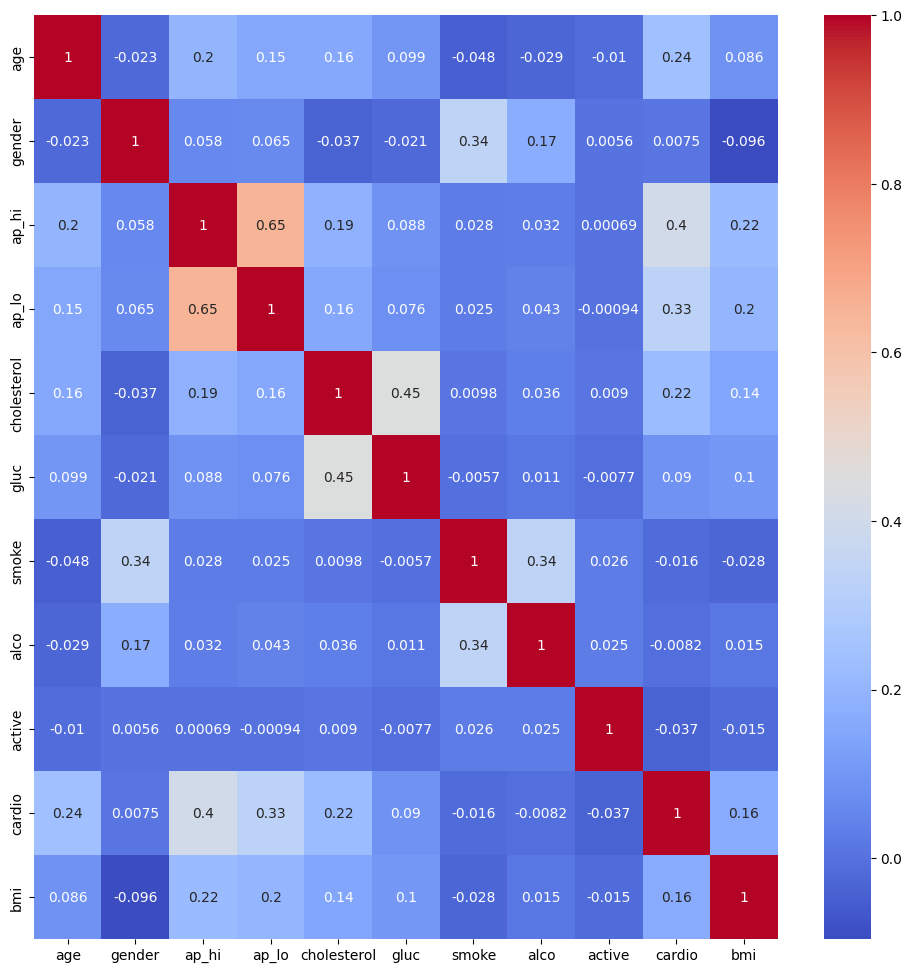

In [52]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)
plt.show

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=20000, solver='lbfgs', random_state=42),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "MLP Neural Network": MLPClassifier()
}

In [27]:

for name, model in models.items():  
    print(f"Training {name}...")
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {np.round(accuracy,2)}")
    print(classification_report(y_test, y_pred))

Training Logistic Regression...
Logistic Regression Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.71      0.78      0.75      5235
           1       0.75      0.68      0.71      5112

    accuracy                           0.73     10347
   macro avg       0.73      0.73      0.73     10347
weighted avg       0.73      0.73      0.73     10347

Training Decision Tree...
Decision Tree Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.65      0.65      0.65      5235
           1       0.64      0.64      0.64      5112

    accuracy                           0.64     10347
   macro avg       0.64      0.64      0.64     10347
weighted avg       0.64      0.64      0.64     10347

Training Random Forest...
Random Forest Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      5235
           1       0.71      0.71      0.71      5112

    a

d:\Heart-Failure\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.71      0.81      0.76      5235
           1       0.77      0.66      0.71      5112

    accuracy                           0.74     10347
   macro avg       0.74      0.73      0.73     10347
weighted avg       0.74      0.74      0.73     10347

Training Naive Bayes...
Naive Bayes Accuracy: 0.71
              precision    recall  f1-score   support

           0       0.68      0.81      0.74      5235
           1       0.75      0.61      0.67      5112

    accuracy                           0.71     10347
   macro avg       0.71      0.71      0.70     10347
weighted avg       0.71      0.71      0.70     10347

Training MLP Neural Network...
MLP Neural Network Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.73      0.78      0.75      5235
           1       0.75      0.70      0.73      5112

    accuracy                           0.7

Training Logistic Regression...


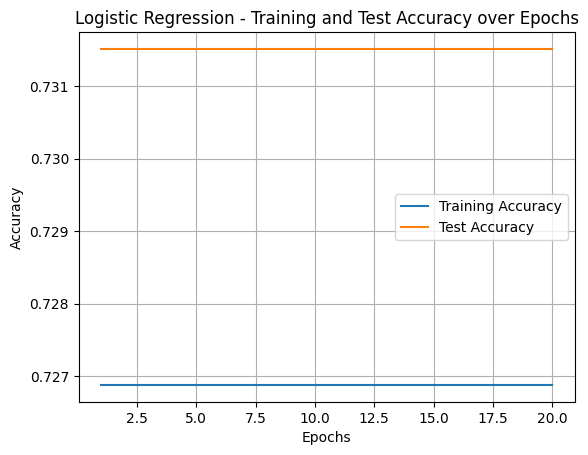

Logistic Regression Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.71      0.78      0.75      5235
           1       0.75      0.68      0.71      5112

    accuracy                           0.73     10347
   macro avg       0.73      0.73      0.73     10347
weighted avg       0.73      0.73      0.73     10347

Training Decision Tree...


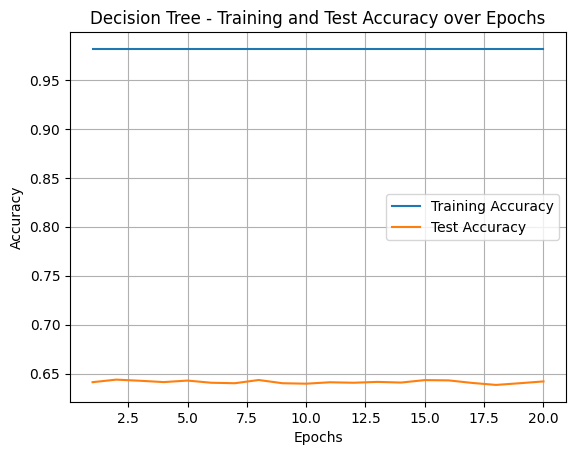

Decision Tree Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.65      0.65      0.65      5235
           1       0.64      0.63      0.64      5112

    accuracy                           0.64     10347
   macro avg       0.64      0.64      0.64     10347
weighted avg       0.64      0.64      0.64     10347

Training Random Forest...


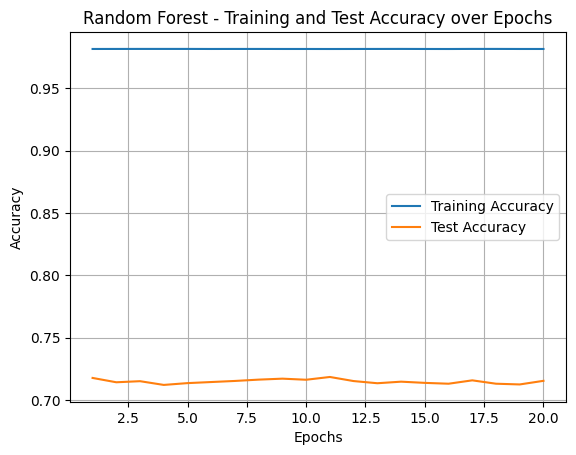

Random Forest Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      5235
           1       0.71      0.71      0.71      5112

    accuracy                           0.72     10347
   macro avg       0.72      0.72      0.72     10347
weighted avg       0.72      0.72      0.72     10347

Training SVM...


In [ ]:
epochs = 20 
training_acc = []
test_acc = []

for name, model in models.items():
    print(f"Training {name}...")

    for epoch in range(epochs):
        model.fit(X_train, y_train)  

        training_acc.append(model.score(X_train, y_train))
        test_acc.append(model.score(X_test, y_test))

    plt.figure()
    plt.plot(range(1, epochs + 1), training_acc, label='Training Accuracy')
    plt.plot(range(1, epochs + 1), test_acc, label='Test Accuracy')
    plt.title(f'{name} - Training and Test Accuracy over Epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.grid(True)
    plt.legend()
    plt.show()

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {np.round(accuracy, 2)}")
    print(classification_report(y_test, y_pred))

    training_acc.clear()
    test_acc.clear()

In [19]:
mean_train = X_train.mean()
std_train = X_train.std()

X_train_scaled = (X_train - mean_train) / std_train
X_val_scaled = (X_val - mean_train) / std_train
X_test_scaled = (X_train - mean_train) / std_train

In [20]:
depths = [20, 37, 50]
models = {}  
for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    models[depth] = model
    
    val_accuracy = accuracy_score(y_val, model.predict(X_val_scaled))
    train_accuracy = accuracy_score(y_train, model.predict(X_train_scaled))
    print(f"Depth: {depth}, Train accuracy: {train_accuracy:.2f}, Validation accuracy: {val_accuracy:.2f}")


d:\Heart-Failure\env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Depth: 20, Train accuracy: 0.87, Validation accuracy: 0.50


d:\Heart-Failure\env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Depth: 37, Train accuracy: 0.98, Validation accuracy: 0.50
Depth: 50, Train accuracy: 0.98, Validation accuracy: 0.50


d:\Heart-Failure\env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [30]:

for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth,random_state=42)
    model.fit(X_train_scaled,y_train)
    
    y_val_pred = model.predict(X_val_scaled)
    y_train_pred = model.predict(X_train_scaled)

    val_mse = mean_squared_error(y_val, y_val_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)

    val_r2 = r2_score(y_val, y_val_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    print(f"Depth: {depth}, Train MSE: {train_mse:.2f}, Validation MSE: {val_mse:.2f}")
    print(f"Depth: {depth}, Train R²: {train_r2:.2f}, Validation R²: {val_r2:.2f}")


d:\Heart-Failure\env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


Depth: 20, Train MSE: 0.09, Validation MSE: 0.50
Depth: 20, Train R²: 0.64, Validation R²: -0.99


d:\Heart-Failure\env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


Depth: 37, Train MSE: 0.01, Validation MSE: 0.50
Depth: 37, Train R²: 0.95, Validation R²: -0.99
Depth: 50, Train MSE: 0.01, Validation MSE: 0.50
Depth: 50, Train R²: 0.96, Validation R²: -0.99


d:\Heart-Failure\env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [40]:
pca_original = PCA(n_components=0.50)
pca_original.fit(X_train_scaled)
x_pca = pca_original.fit_transform(X_train_scaled)

In [35]:


print(f"Обрано компонент: {pca_original.n_components_}")

plt.figure(figsize=(10, 6))  # Розмір графіка

plt.subplot(1, 2, 1)  # 1 рядок, 2 стовпці, 1 графік
plt.scatter(X_train_scaled.iloc[:, 0], X_train_scaled.iloc[:, 1], color='blue', alpha=0.5, label='Оригінальні дані')
sns.regplot(x=X_train_scaled.iloc[:, 0], y=X_train_scaled.iloc[:, 1], scatter=False, color='red', label='Лінія регресії', line_kws={'linestyle': '--'})
plt.title("Розсіювання оригінальних даних")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()

# Графік розсіювання після PCA
plt.subplot(1, 2, 2)  # 1 рядок, 2 стовпці, 2 графік
plt.scatter(x_pca[:, 0], x_pca[:, 1], color='green', alpha=0.5, label='Дані після PCA')
sns.regplot(x=x_pca[:, 0], y=x_pca[:, 1], scatter=False, color='orange', label='Лінія регресії', line_kws={'linestyle': '--'})
plt.title("Розсіювання після PCA")
plt.xlabel('FPC (Перша головна компонента)')
plt.ylabel('SPC (Друга головна компонента)')
plt.legend()
plt.grid()

plt.tight_layout()  # Додає відстань між графіками
plt.show()


sns.kdeplot(X_train_scaled.iloc[:, 0], label='Feature 1', color='blue', fill=True, alpha=0.5)
sns.kdeplot(X_train_scaled.iloc[:, 1], label='Feature 2', color='orange', fill=True, alpha=0.5)
plt.title("Розподіл оригінальних даних")
plt.xlabel('Значення')
plt.ylabel('Щільність')
plt.legend()
plt.grid()
plt.show()  # Показати перший графік

# Крок 3: Графік розподілу після PCA
plt.figure(figsize=(10, 6))  # Розмір графіка
plt.scatter(x_pca[:, 0], x_pca[:, 1], c='green', alpha=0.5)
plt.title("Після PCA")
plt.xlabel('FPC (Перша головна компонента)')
plt.ylabel('SPC (Друга головна компонента)')
plt.grid()
plt.show()  # Показати другий графік


Обрано компонент: 4


In [33]:
noise = np.random.uniform(-0.1,0.1, X_train_scaled.shape)
X_train_noisy = X_train_scaled + noise

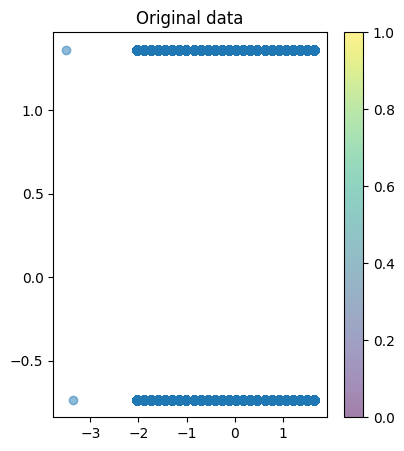

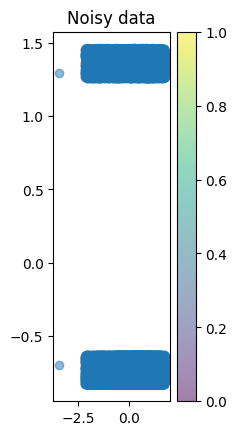

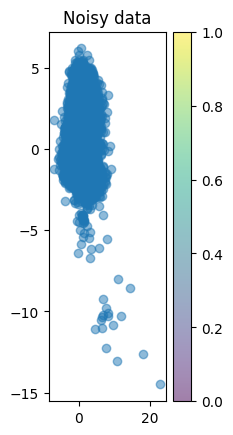

<Figure size 640x480 with 0 Axes>

In [39]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1], alpha=0.5)
plt.colorbar()
plt.title("Original data")
plt.show()


plt.subplot(1,3,1)
plt.scatter(X_train_noisy[:,0],X_train_noisy[:,1], alpha=0.5)
plt.colorbar()
plt.title("Noisy data")
plt.show()

plt.subplot(1,3,1)
plt.scatter(x_pca[:,0],x_pca[:,1], alpha=0.5)
plt.colorbar()
plt.title("Noisy data")
plt.show()

plt.tight_layout()

In [42]:
pca_noisy = PCA(n_components=0.95)
pca_noisy.fit(X_train_scaled)
x_pcaa = pca_noisy.fit_transform(X_train_noisy)

In [43]:
n_components = np.argmax(np.cumsum(pca_noisy.explained_variance_ratio_)>=0.95)+1
pca = PCA(n_components=n_components)
X_train_denoised = pca.inverse_transform(pca.fit_transform(X_train_noisy))

In [98]:
for depth in depths:
    
    model_original = DecisionTreeClassifier(max_depth=depth,random_state=42)
    model_original.fit(X_train_scaled, y_train)

    model_noisy = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model_noisy.fit(X_train_noisy, y_train)
    
    model_denoised = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model_denoised.fit(X_train_denoised, y_train)
    
    train_original = accuracy_score(y_train, model_original.predict(X_train_scaled))
    val_original = accuracy_score(y_val, model_original.predict(X_val_scaled))
    
    train_accuracy_noisy = accuracy_score(y_train, model_noisy.predict(X_train_noisy))
    val_accuracy_noisy = accuracy_score(y_val, model_noisy.predict(X_val_scaled))
    
    train_accuracy_denoised = accuracy_score(y_train, model_denoised.predict(X_train_denoised))
    val_accuracy_denoised = accuracy_score(y_val, model_denoised.predict(X_val_scaled))
    
    print(f"Depth: {depth} | Original Train Accuracy: {train_original:.2f} | Noisy Train Accuracy: {train_accuracy_noisy:.2f} | Validation Accuracy: {val_accuracy_noisy:.2f}\n")
    
    print(f"Depth: {depth} | Denoised Train Accuracy: {train_accuracy_denoised:.2f} | Validation Accuracy: {val_accuracy_denoised:.2f}\n")

d:\Heart-Failure\env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Depth: 20 | Original Train Accuracy: 0.87 | Noisy Train Accuracy: 0.91 | Validation Accuracy: 0.69

Depth: 20 | Denoised Train Accuracy: 0.90 | Validation Accuracy: 0.65



d:\Heart-Failure\env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Depth: 37 | Original Train Accuracy: 0.98 | Noisy Train Accuracy: 1.00 | Validation Accuracy: 0.65

Depth: 37 | Denoised Train Accuracy: 0.99 | Validation Accuracy: 0.61

Depth: 50 | Original Train Accuracy: 0.98 | Noisy Train Accuracy: 1.00 | Validation Accuracy: 0.65

Depth: 50 | Denoised Train Accuracy: 1.00 | Validation Accuracy: 0.61



d:\Heart-Failure\env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


<Axes: >

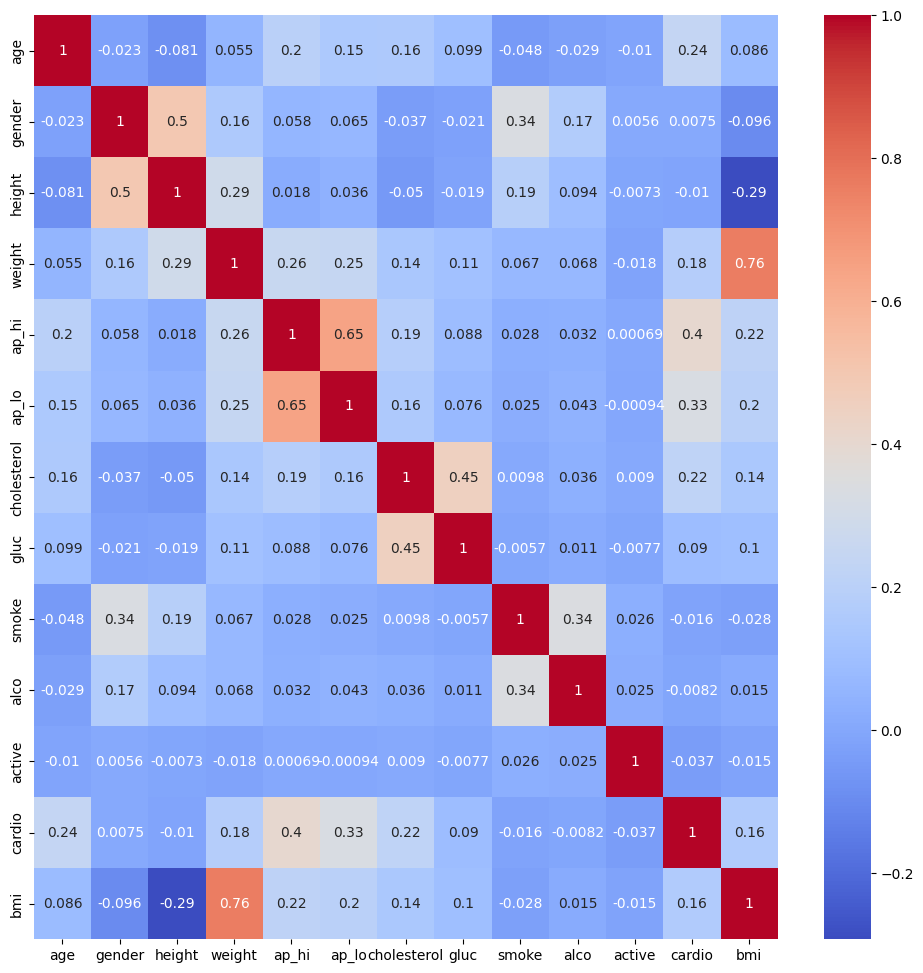

In [44]:
plt.figure(figsize = (12,12))
sns.heatmap(data.corr(),annot= True,cmap = 'coolwarm')

In [15]:
d = {1: 'women', 2:'men'}
data['gender'] = data['gender'].replace(d)

Тут я намагаюся використати PyTorch для навчання моделі нашого датасету.

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim

In [42]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

In [43]:
class CardioHeartModel(nn.Module):
    def __init__(self, input_size):
        super(CardioHeartModel, self).__init__()
        self.fc1 = nn.Linear(input_size,64)
        self.fc2 = nn.Linear(64,32)
        self.fc3 = nn.Linear(32,1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return self.sigmoid(x)

In [44]:
model = CardioHeartModel(X_train_tensor.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(),lr=0.01)

In [46]:
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.5729
Epoch [20/100], Loss: 0.5569
Epoch [30/100], Loss: 0.5520
Epoch [40/100], Loss: 0.5494
Epoch [50/100], Loss: 0.5469
Epoch [60/100], Loss: 0.5449
Epoch [70/100], Loss: 0.5432
Epoch [80/100], Loss: 0.5417
Epoch [90/100], Loss: 0.5403
Epoch [100/100], Loss: 0.5392


In [51]:
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    predictions = (predictions > 0.5).float()  # Бінаризація результатів
    accuracy = (predictions == y_test_tensor).float().mean()
    print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.7356


Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'bmi'],
      dtype='object')